## Обучение с учителем

#### Импорт библиотек

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import pickle
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Функция вывода оценок качества модели регрессии(взята из 4 вебинара)

In [130]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

### Отбор признаков

In [138]:
PREPARED_DATASET2_PATH = 'prepared2.csv'
df = pd.read_csv(PREPARED_DATASET2_PATH)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   33.055889            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1          Price  StudioApartment  Ecology_2_A  \
0            0       11  184966.930730                0            0   
1            1       16  300009.450063                0            0   
2            1        3  220925.908524                1            0   
3            0        5  175616.227217                0            0   
4            2        4  150226.531644                0            0   

   Ecology_3_A  Shops_2_A  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0

In [139]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'StudioApartment',
 'Ecology_2_A',
 'Ecology_3_A',
 'Shops_2_A']

In [140]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3','Healthcare_1','Helthcare_2','Shops_1',
                'Ecology_2_A','Ecology_3_A','Shops_2_A','StudioApartment']
target_name = 'Price'

In [141]:
df = df[feature_names + [target_name]]
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   33.055889            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  StudioApartment  \
0            0       11            0            0          0                0   
1            1       16            0            0          0                0   
2            1        3            0            0          0                1   
3            0        5            0            0          0                0   
4            2        4            0            0          0                0   

           Price  
0  184966.930730  
1  300009.450063  
2  220925.908524  
3  175616.227217  
4  150226.531644

In [142]:
df.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.892900     56.241541     33.783734       5.695650   
std       43.587592      0.839583     19.059935     13.568688       3.958821   
min        0.000000      1.000000     16.117154      9.985700       0.000000   
25%       20.000000      1.000000     41.804025     22.201722       1.000000   
50%       36.000000      2.000000     52.539909     32.525279       6.000000   
75%       75.000000      2.000000     65.900625     41.858521       9.000000   
max      209.000000     19.000000    275.645284    233.949309      32.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       8.526700     13.764600   1984.872200      0.118858     24.687000   
std        5.241148      5.822747     18.415971      0.119025     17.532614   
min        1.000000      1.000000   1910.000000      0.000000      0.000000   
25%        4.000000      9.000000   1974.000000      0.017647      6.000000   
50%        7.000000     14.000000   1977.000000      0.075424     25.000000   
75%       12.000000     17.000000   2001.000000      0.195781     36.000000   
max       42.000000     48.000000   2020.000000      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1026.358900      1.319500      4.231300   
std     4006.799803     23.831875    746.662828      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    830.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000    990.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

        Ecology_2_A   Ecology_3_A     Shops_2_A  StudioApartment  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean       0.009700      0.027500      0.082500         0.069700   
std        0.098015      0.163543      0.275139         0.254653   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.000000         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

### Стандартизация признаков

In [143]:
feature_names_for_stand = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3','Healthcare_1','Helthcare_2','Shops_1']
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [144]:
df['DistrictId'] = df['DistrictId'].astype(float)
df['Rooms'] = df['Rooms'].astype(float)
df['Floor'] = df['Floor'].astype(float)
df['HouseFloor'] = df['HouseFloor'].astype(float)
df['HouseYear'] = df['HouseYear'].astype(float)
df['Social_1'] = df['Social_1'].astype(float)
df['Social_2'] = df['Social_2'].astype(float)
df['Social_3'] = df['Social_3'].astype(float)
df['Shops_1'] = df['Shops_1'].astype(float)
df['Helthcare_2'] = df['Helthcare_2'].astype(float)

In [145]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [146]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df.head()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare     Floor  \
0   -0.353348  0.127570 -0.433390   -0.319943       0.076883 -0.291306   
1   -0.215687  1.318696  0.495415    0.461808       0.582109 -0.291306   
2    0.059635  0.127570 -0.592560   -0.338010      -1.438796 -0.100498   
3    0.174352  0.127570 -0.151559   -0.053644       0.834722 -0.100498   
4    1.115034 -1.063557 -0.870579   -0.737585       0.329496  0.471924   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0   -0.818315  -0.861915  -0.250529  0.474169  0.654880 -0.127533   
1   -0.818315  -0.373184  -0.998053  1.215681  1.237169 -0.295384   
2   -0.303068  -0.916218  -0.581588  0.531208  0.600720 -0.337347   
3    0.555676  -0.427487   2.680470 -0.096225  0.095553 -0.211458   
4   -0.303068  -0.481791  -0.894969  0.588247  0.105786 -0.295384   

   Healthcare_1  Helthcare_2   Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  \
0     -0.169240    -0.883480  1.408356            0            0          0   
1     -1.053217    -0.213923  2.448700            0            0          0   
2     -1.067950    -0.213923 -0.256195            0            0          0   
3      0.077202    -0.883480  0.159943            0            0          0   
4      1.408526     0.455633 -0.048126            0            0          0   

   StudioApartment          Price  
0                0  184966.930730  
1                0  300009.450063  
2                1  220925.908524  
3                0  175616.227217  
4                0  150226.531644

### Разбиение на train и test

In [147]:
X = df[feature_names]
y = df[target_name]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=666)

### Построение базовых моделей и выбор лучшей

#### Linear Regression

In [149]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

R2:	0.536
MAE:	43114.465
MSE:	3981283026.002


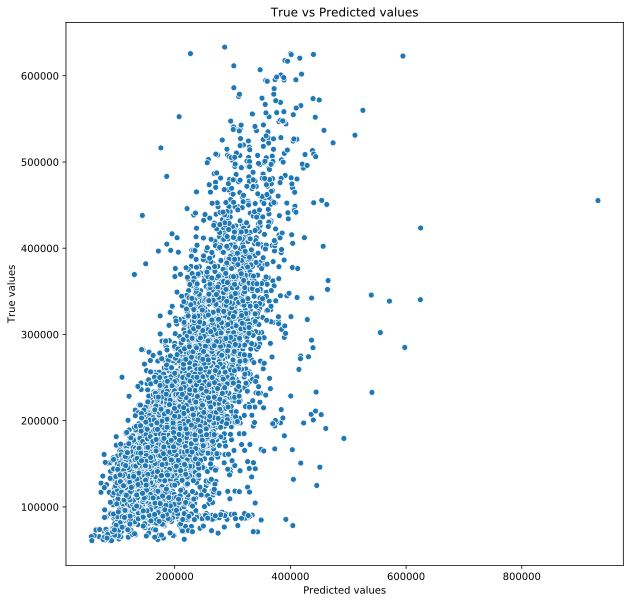

In [150]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.549
MAE:	43241.407
MSE:	3933105599.813


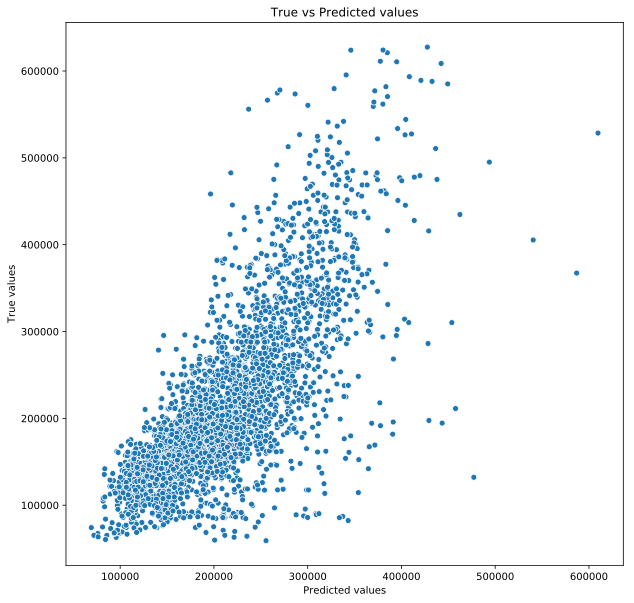

In [151]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Random Forest

In [152]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

C:\Users\stroganov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

R2:	0.946
MAE:	12149.378
MSE:	466865313.191


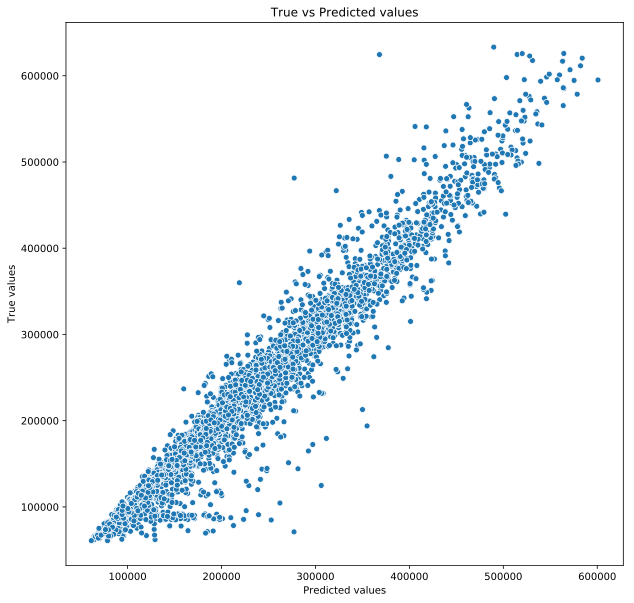

In [153]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.693
MAE:	31124.716
MSE:	2676494927.899


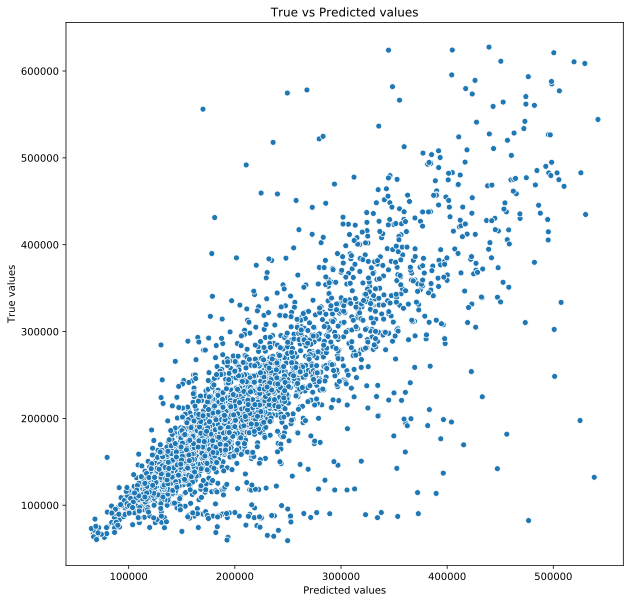

In [154]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Gradient Boosting

In [155]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.759
MAE:	29009.982
MSE:	2065267877.398


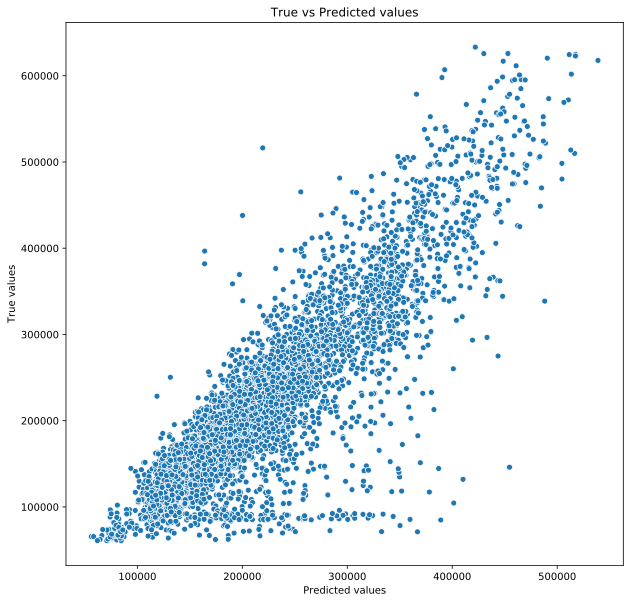

In [156]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.719
MAE:	30823.039
MSE:	2455201830.77


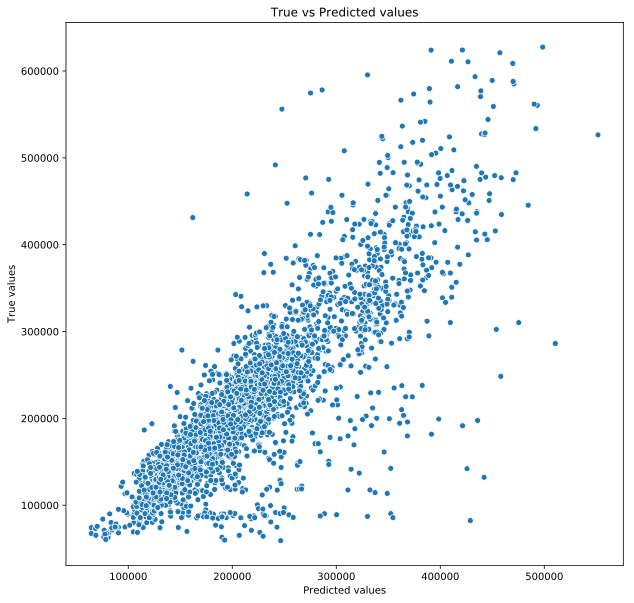

In [157]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Настройка и оценка финальной модели

#### Подбор гиперпараметров

#### Gradient Boosting

In [218]:
gb_model = GradientBoostingRegressor(random_state=5)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [219]:
params = {'n_estimators':[125,200,300], 
          'max_depth':[3,6,8]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=5, random_state=5, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [125], 'max_depth': [6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [220]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 125}

In [221]:
gs.best_score_

0.7460077781232533

#### Random Forest

In [222]:
rf_model = RandomForestRegressor(random_state=5)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [223]:
params_rf = {'n_estimators':[300,350,400], 
          'max_depth':[10,12,15]}

gs_rf = GridSearchCV(rf_model, params_rf, scoring='r2', cv=KFold(n_splits=5, random_state=5, shuffle=True), n_jobs=-1)
gs_rf.fit(X, y)

KeyboardInterrupt: 

In [195]:
gs_rf.best_params_

{'max_depth': 15, 'n_estimators': 400}

In [196]:
gs_rf.best_score_

0.7325856084737091

#### Обучение и оценка модели

#### Gradient Boosting

In [214]:
final_model = GradientBoostingRegressor(n_estimators=125, max_depth=6, random_state=5, learning_rate=0.1)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=125, n_iter_no_change=None, presort='auto',
             random_state=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.909
MAE:	18467.037
MSE:	779492577.417


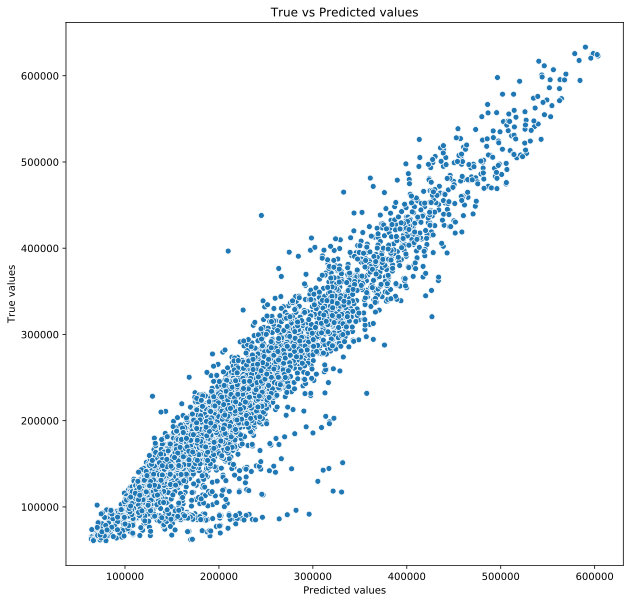

In [215]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.741
MAE:	28006.733
MSE:	2259804529.556


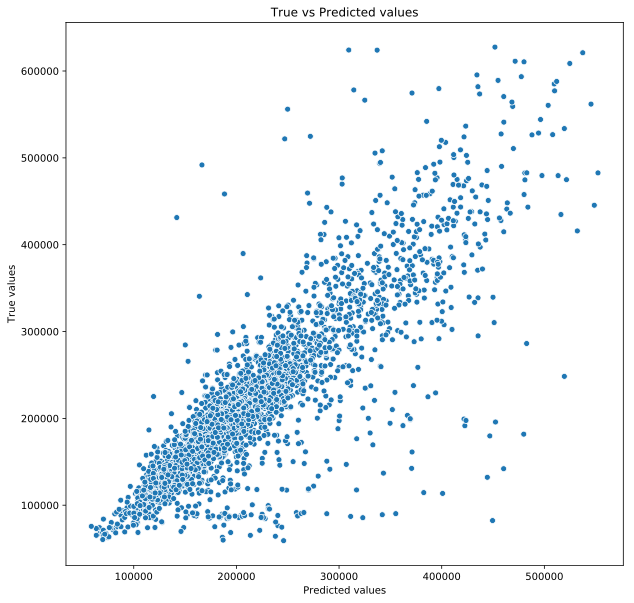

In [216]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Random Forest

In [224]:
final_model_rf = RandomForestRegressor(n_estimators=400, max_depth=15, random_state=5)
final_model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

R2:	0.938
MAE:	14756.379
MSE:	527399940.997


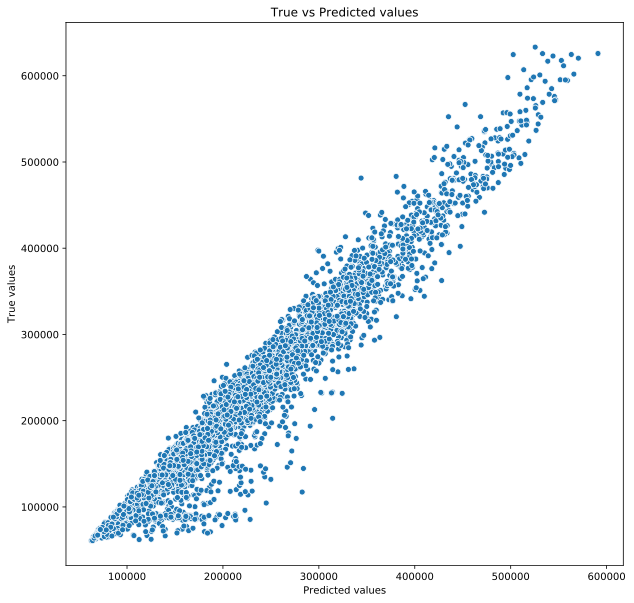

In [225]:
y_train_preds = final_model_rf.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.724
MAE:	28739.642
MSE:	2403461596.691


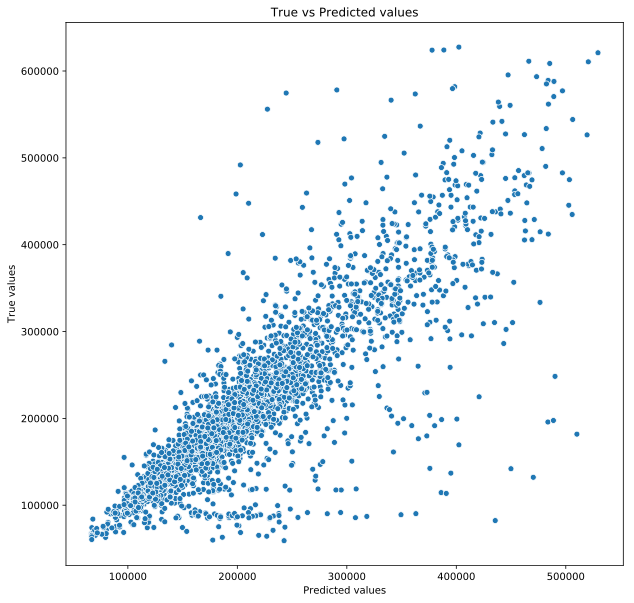

In [226]:
y_test_preds = final_model_rf.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [113]:
df.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.892900     56.387868     34.389641       5.802100   
std       43.587592      0.839583     20.976326     16.226131       4.767264   
min        0.000000      1.000000     16.117154     -9.861591       0.000000   
25%       20.000000      1.000000     41.804025     22.041360       1.000000   
50%       36.000000      2.000000     52.539909     32.552134       6.000000   
75%       75.000000      2.000000     65.925548     43.180983       9.000000   
max      209.000000     19.000000    641.065193    621.065193     123.000000   

              Floor   HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean       8.526700     13.79380   1984.872200      0.118858     24.687000   
std        5.241148      6.03403     18.415971      0.119025     17.532614   
min        1.000000      1.00000   1910.000000      0.000000      0.000000   
25%        4.000000      9.00000   1974.000000      0.017647      6.000000   
50%        7.000000     14.00000   1977.000000      0.075424     25.000000   
75%       12.000000     17.00000   2001.000000      0.195781     36.000000   
max       42.000000    117.00000   2020.000000      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1026.358900      1.319500      4.231300   
std     4006.799803     23.831875    746.662828      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    830.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000    990.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

        Ecology_2_A   Ecology_3_A     Shops_2_A  StudioApartment  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean       0.009700      0.027500      0.082500         0.069700   
std        0.098015      0.163543      0.275139         0.254653   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.000000         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

In [65]:
df.drop(['Social_2'],axis=1,inplace=True);

In [66]:
feature_names.remove('Social_2')

In [67]:
X = df[feature_names]
y = df[target_name]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=666)

In [69]:
X_train.head()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare     Floor  \
8404    0.174352 -1.063557 -0.783410   -1.011074       0.461063 -0.100498   
235    -0.674556  0.127570 -0.665774   -0.388415      -0.168260 -1.054535   
9747   -0.949877  1.318696  0.550013    0.437060       0.670838  1.044346   
8833   -0.468065 -1.063557 -0.548573   -0.784312      -1.007358  1.616769   
3807   -0.949877  1.318696  0.717441    0.657269       0.670838  0.090309   

      HouseFloor  HouseYear  Ecology_1  Social_1  Social_3  Healthcare_1  \
8404   -0.794500  -1.024825   0.252450 -0.894777 -0.295384      0.540621   
235    -1.457440  -1.079128  -0.710187  0.017853 -0.211458     -0.169240   
9747    0.697115   1.255918   0.358549  0.017853 -0.295384     -1.334483   
8833    0.531380  -0.427487  -0.997984 -0.153265  5.579395      0.026306   
3807    0.034175   0.549974   0.358549  0.017853 -0.295384     -1.334483   

      Helthcare_2   Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  \
8404     1.125190 -0.464264            0            0          0   
235     -0.883480 -0.048126            0            0          0   
9747     0.455633 -0.048126            0            0          0   
8833     1.125190  3.905183            0            0          0   
3807     0.455633 -0.048126            0            0          0   

      StudioApartment  
8404                0  
235                 0  
9747                0  
8833                0  
3807                0

In [83]:
params = {'n_estimators':[75,100, 150,200], 
          'max_depth':[4,5,6, 7]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...e=666, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 75, 100, 150], 'max_depth': [6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [84]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 150}

In [85]:
gs.best_score_

0.739256063879325

In [86]:
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=666, learning_rate=0.1)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=666, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.933
MAE:	16085.507
MSE:	574297438.564


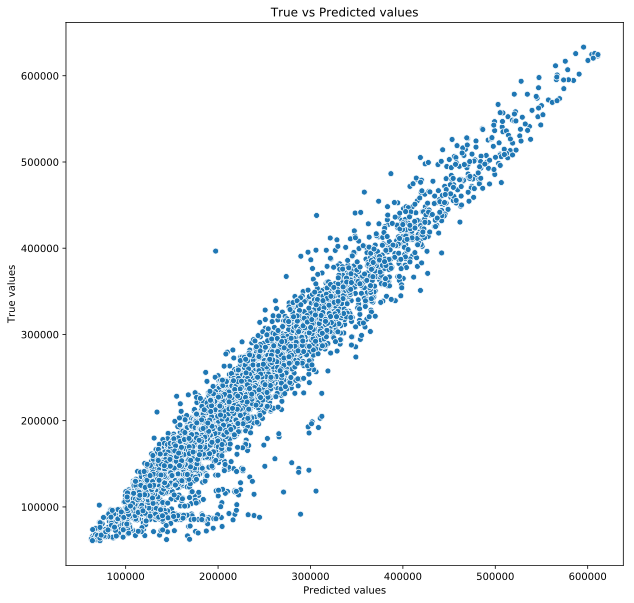

In [87]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.737
MAE:	28212.375
MSE:	2295220228.216


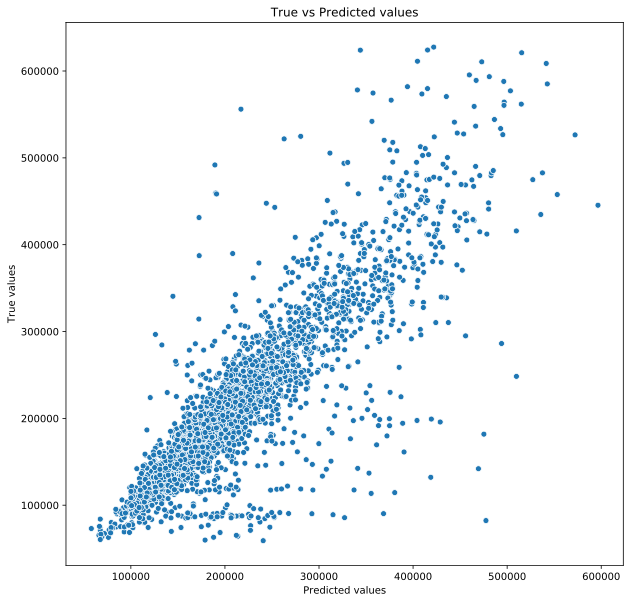

In [88]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)